In [3]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import librosa
from scipy.io import wavfile
import soundfile as sf

In [4]:
def get_spectrogram(filename):
    audio, sr = librosa.load(filename, sr = None)

    window_size = 1024  # Размер окна для STFT(преобр фурье)
    hop_length = int(window_size / 4)  # шаг сдвига между последовательными окнами
    n_fft = window_size


    spectrogram = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length, window=signal.hann(window_size))  #оконная функция Хана для фурье
    spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max) #преобразование амплитуды спектрограммы в децибелы относительно максимальной амплитуды


    # Строим спектрограмму
    plt.figure(figsize=(12, 5))
    librosa.display.specshow(spectrogram_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log') 
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    return plt

In [20]:
# фильтр Савголя
sample_rate, data = wavfile.read('../9sem/results/input/piano_mono.wav')
data = data.astype(float)
data 

window_length = 51
polyorder = 3  #порядок полинома

if window_length > len(data) or window_length % 2 == 0:
    window_length = min(window_length, len(data) - 1)  # Уменьшаем до допустимого размера
    if window_length % 2 == 0:
        window_length -= 1  # Сделаем нечетным
        
filtered_data = signal.savgol_filter(data, window_length, polyorder)

filtered_data = filtered_data.astype('int16')
wavfile.write('../9sem/results/output/piano_savgol_filter.wav', sample_rate, filtered_data)

In [21]:
# Wiener filter
sample_rate, data = wavfile.read("../9sem/results/input/piano_mono.wav")
data = data.astype(float)

filtered_data = signal.wiener(data)

filtered_data = filtered_data.astype('int16')
wavfile.write('../9sem/results/output/piano_wiener.wav', sample_rate, filtered_data)

c:\Users\Kokovino\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_signaltools.py:1657: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
c:\Users\Kokovino\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_signaltools.py:1657: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


C:\Users\Kokovino\AppData\Local\Temp\ipykernel_2656\3050060786.py:9: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  spectrogram = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length, window=signal.hann(window_size))


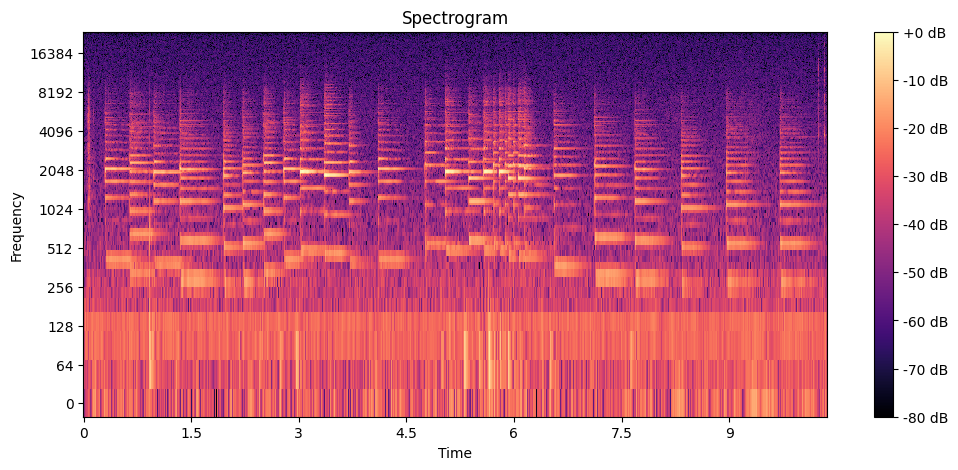

In [23]:
spectrogram_original = get_spectrogram("../9sem/results/input/piano_mono.wav")
spectrogram_original.savefig('../9sem/results/output/spectrogram_original.png')

C:\Users\Kokovino\AppData\Local\Temp\ipykernel_2656\3050060786.py:9: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  spectrogram = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length, window=signal.hann(window_size))


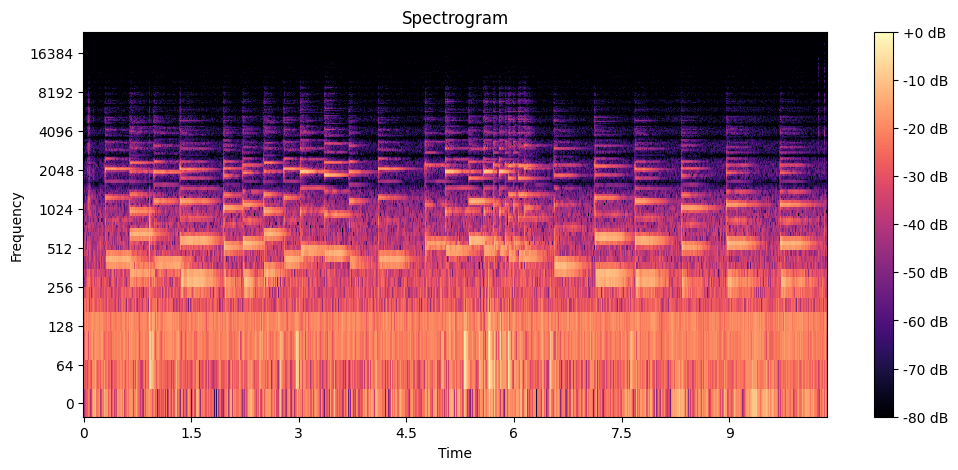

In [24]:
spectrogram_savgol_filter = get_spectrogram("../9sem/results/output/piano_savgol_filter.wav")
spectrogram_savgol_filter.savefig('../9sem/results/output/spectrogram_savgol_filter.png')

C:\Users\Kokovino\AppData\Local\Temp\ipykernel_2656\3050060786.py:9: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  spectrogram = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length, window=signal.hann(window_size))


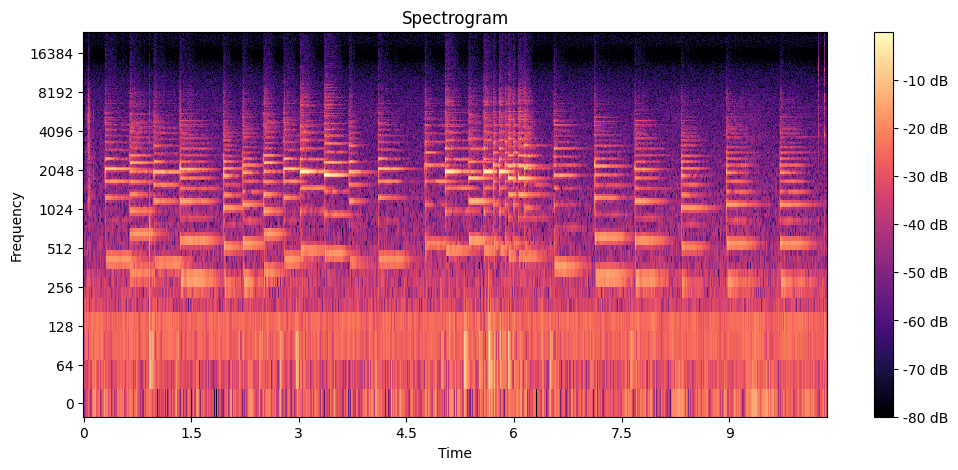

In [25]:
spectrogram_wiener = get_spectrogram("../9sem/results/output/piano_wiener.wav")
spectrogram_wiener.savefig("../9sem/results/output/spectrogram_wiener.png")

In [26]:
# Add noise to audiofile
audio, sr = librosa.load('../9sem/results/input/piano_mono.wav', sr = None)
RMS = np.sqrt(np.mean(audio**2))
STD_n = 0.001
noise = np.random.normal(0, STD_n, audio.shape[0])
audio_noise = audio + noise
sf.write('../9sem/results/output/piano_mono_with_noise.wav', audio_noise, sr)

C:\Users\Kokovino\AppData\Local\Temp\ipykernel_2656\3050060786.py:9: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  spectrogram = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length, window=signal.hann(window_size))


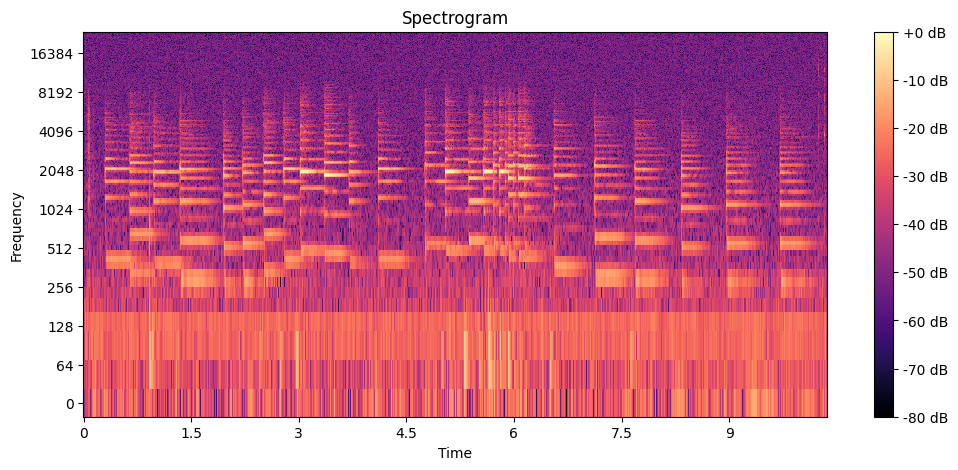

In [27]:
spectrogram_noise = get_spectrogram("../9sem/results/output/piano_mono_with_noise.wav")
spectrogram_noise.savefig("../9sem/results/output/spectrogram_noise.png")

In [28]:
# Savgol filter for noise audiofile
sample_rate, data = wavfile.read('../9sem/results/output/piano_mono_with_noise.wav')
data = data.astype(float)
window_length = 51
polyorder = 3

filtered_data = signal.savgol_filter(data, window_length, polyorder)
filtered_data = filtered_data.astype('int16')

wavfile.write('../9sem/results/output/piano_mono_with_noise_via_savgol_filter.wav', sample_rate, filtered_data)

C:\Users\Kokovino\AppData\Local\Temp\ipykernel_2656\3050060786.py:9: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  spectrogram = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length, window=signal.hann(window_size))


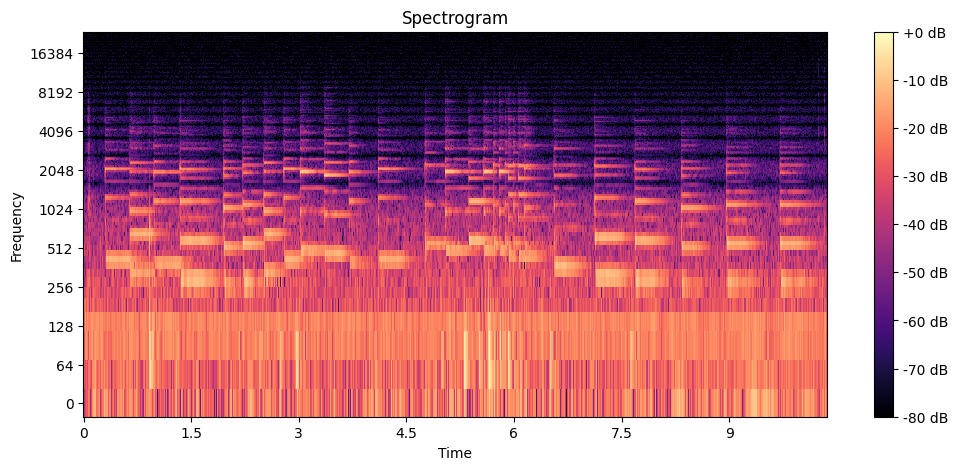

In [29]:
spectrogram_noise_via_savgol = get_spectrogram("../9sem/results/output/piano_mono_with_noise_via_savgol_filter.wav")
spectrogram_noise_via_savgol.savefig("../9sem/results/output/spectrogram_noise_via_savgol.png")

In [30]:
def find_high_energy_moments(filename, delta_t=0.1, delta_f=50):
    audio, sr = librosa.load(filename, sr=None)
    n_fft = int(sr * delta_t)  # размер окна в сэмплах
    hop_length = n_fft // 4

    stft_result = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length) #кратковременное фурье
    magnitudes = np.abs(stft_result) #вычисление модулей комплексных чисел фурье для амплитуд каждого временного отрезка и частоты
    energy = np.sum(magnitudes, axis=0) #суммирование амплитуд по частотам

    high_energy_moments = np.argpartition(energy, -5)[-5:] #выбор индексов пяти временных отрезков с наибольшей энергией
    high_energy_times = (high_energy_moments * hop_length) / sr

    return high_energy_times

In [31]:
high_energy_times = find_high_energy_moments("../9sem/results/input/piano_mono.wav")
print("Моменты времени с высокой энергией:", high_energy_times)

Моменты времени с высокой энергией: [6.15  5.8   5.925 5.05  3.025]
